# Analysing the Data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('KS.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [2]:
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,percent_missing
usd pledged,1.0
ID,0.0
name,0.0
category,0.0
main_category,0.0
currency,0.0
deadline,0.0
goal,0.0
launched,0.0
pledged,0.0


In [3]:
df[df['usd pledged'].isnull()].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00


Since we are just classifying variables to predict success or failure, we can ignore the missing pledge, as we will be dropping it.

In [4]:
df.nunique()

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

Based on the uniqe values observed in the dataframe, we further explore the state variable to study its distribution.

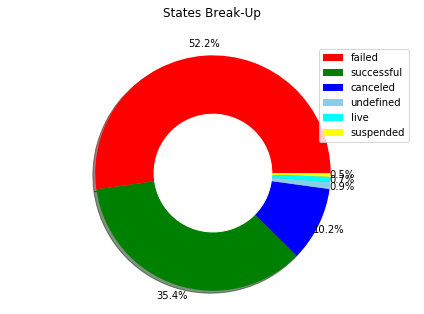

In [5]:
states = df["state"].value_counts() / len(df["state"]) * 100
names = states.index
size = states.values
pie_chart = plt.Circle((0,0), 0.5, color = 'white')
fig1, ax1 = plt.subplots()
plt.pie(size, autopct='%1.1f%%',
        shadow=True, startangle=0,pctdistance=1.1, colors = ['red','green','blue','skyblue','cyan','yellow'])
p=plt.gcf()
p.gca().add_artist(pie_chart)
ax1.legend(labels=names)
ax1.axis('equal')
plt.tight_layout()
plt.title('States Break-Up', y=1.08)
plt.show()

In [6]:
df = df[df['state'].isin(['successful', 'failed'])]
df.goal.describe()

count    3.316750e+05
mean     4.425157e+04
std      1.117917e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

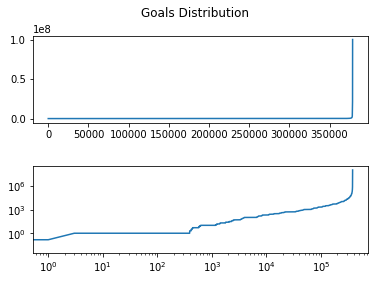

('shape of data before filtering', (331675, 15))


In [7]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
x = df.goal.index
y = np.sort(df.goal.values)
ax1.plot(x, y)
ax2.loglog(x, y)
f.subplots_adjust(hspace=0.5)
f.suptitle("Goals Distribution")
plt.show()
print('shape of data before filtering',df.shape)

Here we observe a sudden growth in the goal beyond 10^6 shooting up exponentially. We need to further check the details of goals above standard deviation as there can possibly be high volume of unrealistic goals.

In [8]:
before = df.shape[0]
print('shape of data before filtering',before)
t_df = df[df.goal >= df['goal'].std()]
after_goal = t_df.shape[0]
print('shape of data after filtering for goals beyond $1117916.69',after_goal)
t_df = t_df[t_df.state != 'successful']
after_state = t_df.shape[0]
print('shape of data after filtering out all success',after_state)
t_df.head()

('shape of data before filtering', 331675)
('shape of data after filtering for goals beyond $1117916.69', 874)
('shape of data after filtering out all success', 862)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
528,1002538085,Green Lizzie: The only container truly adapted...,Product Design,Design,SEK,2017-03-25,1700000.0,2017-02-24 09:06:26,40835.0,failed,34,SE,761.14,4579.92,190666.32
971,1004941506,Maori MBT Awareness Centre,Web,Journalism,CAD,2017-10-18,2000000.0,2017-08-19 22:13:55,2242.0,failed,19,CA,1160.67,1794.46,1600768.37
1042,1005237669,The Old Soul of a Lion,Film & Video,Film & Video,USD,2014-10-14,3000000.0,2014-08-15 20:16:22,4.0,failed,2,US,4.00,4.00,3000000.00
1415,1007217653,QUIUBO,Sound,Technology,MXN,2017-11-13,2400000.0,2017-10-01 19:39:35,27296.0,failed,24,MX,442.58,1433.46,126037.18
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.0,2014-06-21 22:34:21,285.0,failed,5,CA,263.41,264.67,3575408.62


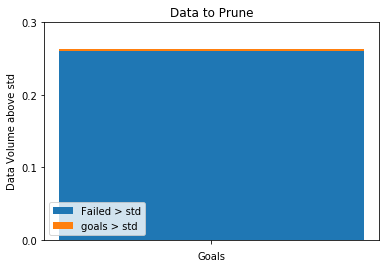

98.6270022883
(0.25989296751337904, 0.26351096706112914)


In [9]:
total = 100.0
# todo print actual percentage and remove log10
after_state_bar = (after_state * total/before)
after_goal_bar = (after_goal * total/before)
p0 = plt.bar([0], after_state_bar)
p1 = plt.bar([0], after_goal_bar-after_state_bar,bottom=after_state_bar)
total = after_goal_bar
#p2 = plt.bar([0], total, bottom=after_goal_bar-after_state_bar)

plt.title('Data to Prune')
plt.ylabel('Data Volume above std')
plt.xlabel('Goals')
plt.xticks([0], (''))
plt.yticks(np.arange(0, total+0.1, 0.1))
plt.legend((p0[0], p1[0]), ('Failed > std', 'goals > std'))
plt.show()
print((after_state_bar/after_goal_bar)*100.0)
print(after_state_bar, after_goal_bar)

As we observe with the stacked bar chart, about 98.62% of all goals which are above $1117916.69 failed.
This gives us a good opportunity to further explore this 0.259% data from the data set for pruning to run our classification algorithm.

In [10]:
t_df = df[(df['goal'] <= df['goal'].std()) | ((df['goal'] >= df['goal'].std()) & (df['state'] == 1)) ].copy()
print(t_df.shape[0])
t_df.head()

330801


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


Here we take all value under $1117916.69 and only the values whcich were successful above $1117916.69, would make the data suboptimal according to our assumtions.

In [11]:
y = df['goal']
mean = y.mean()
std = y.std()
count = 0
for yi in y:
    zs = (yi-mean)/std
    if zs>1:
        count += 1
        #print(zs)
print(count)

870


We apply Two-Sided Grubb's Test to remove Outliers

In [12]:
#t_test = stats.ttest_1samp(t_df['goal'],df['goal'].mean())
import math
a = 0.05
N = before
p = 1-(a/(2*N))
nn = N-2
value = stats.t.ppf(p, nn)
print(value)
value**=2
print(value)
thresh = math.sqrt(value/(nn*value)) * (N-1)/math.sqrt(N)
print(thresh)
y = df['goal']

term_factor_max = 0
term_factor_min = 0
mean = y.mean()
std = y.std()
mean_dev = abs(y-mean)
for i in range(N):

    y_max = mean_dev.idxmax()
    y_min = mean_dev.idxmin()
    if y_max == term_factor_max and y_min == term_factor_min:
        break
    term_factor_max = y_max
    term_factor_min = y_min
    G1 = abs(mean_dev[y_min])/std
    G2 = abs(mean_dev[y_max])/std
    if G1>thresh:
        mean_dev = mean_dev[mean_dev != mean_dev[y_min]]
        y = y[y != y[y_min]]
    if G2>thresh:
        mean_dev = mean_dev[mean_dev != mean_dev[y_max]]
        y = y[y != y[y_max]]
    #print(i, thresh, G1, y_min, G2, y_max)
p = stats.t.cdf(value, nn)
print(p)

5.2517542379978615
27.580922576328497
1.0
1.0


In [13]:
print('Detected Outliers',N-y.shape[0])
print(y.shape[0])

('Detected Outliers', 870)
330805


Looking into the duration of goals:

In [14]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration'] = df['deadline'].subtract(df['launched'])
df['duration'] = df['duration'].astype('timedelta64[D]')
df = df.drop('launched', 1)
df = df.drop('deadline', 1)
df.duration.describe()

count    331675.000000
mean         32.954902
std          12.713329
min           0.000000
25%          29.000000
50%          29.000000
75%          35.000000
max          91.000000
Name: duration, dtype: float64

In [15]:
z = df['duration']
meanz = z.mean()
stdz = z.std()
term_factor_max = 0
term_factor_min = 0
for i in range(N):
    z_max = z.idxmax()
    z_min = z.idxmin()
    if z_max == term_factor_max and z_min == term_factor_min:
        break
    term_factor_max = z_max
    term_factor_min = z_min
    G1 = abs(z[z_min]-mean)/std
    G2 = abs(z[z_max]-mean)/std
    if G1>thresh:
        z = z[z != z[z_min]]
    if G2>thresh:
        z = z[z != z[z_max]]
    #print(i, thresh, G1, z_min, G2, z_max)
p = stats.t.cdf(value, nn)
print(p)

1.0


In [16]:
print('Detected Outliers',N-z.shape[0])

('Detected Outliers', 0)


We observe no outliers in duration of the goals.

In [17]:
yy = df['goal']
std = yy.std()
yy = yy[yy <= std]
yy.head()
N-yy.shape[0]

874

Comparing the values of goals against standard deviation we get a similar result of that with Grubbs' Test 874 vs 870

In [18]:
count = 0
for yi in y:
    zs = (yi-mean)/std
    if zs>1:
        count += 1
        print(zs)
print(count)

0


Finally re-verifying it with Z-Score